In [1]:
import os
import sys
sys.path.append('/home/user/Desktop/Thesis_Scripts/Modules')

from Tkinter import *
import Tkinter, Tkconstants, tkFileDialog
import Import_module as im
import Filtering_module as fm

import Spiker as sp

import numpy as np 
from h5py import File
import math

import time

import matplotlib
matplotlib.use('TkAgg') #Not case-sensitive
#%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
plt.rc('text', usetex=True)
'''
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import datashade
import datashader.transfer_functions as tf
hv.extension('bokeh')
'''

"\nimport holoviews as hv\nimport datashader as ds\nfrom holoviews.operation.datashader import datashade\nimport datashader.transfer_functions as tf\nhv.extension('bokeh')\n"

### Explore the stimulation artifacts whithin the microstructures

In [2]:
#Let the user select a dataset and open the h5 file

root = Tk()
root.withdraw()#Remove the root window from the screen without removing it
path = tkFileDialog.askopenfilename(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

/home/user/Desktop/Data/2018-7-9/2318/Stimulation_6972/stimulation_el_6972_amp_070_phase_010.raw.h5


In [3]:
begin = time.time()
raw = im.import_rawdata(path,0,'end',modified=False)
end = time.time()
elapsed = end - begin
print 'elapsed time: {0:.1f} seconds'.format(elapsed)

elapsed time: 1.6 seconds


In [4]:
filtdat = fm.Filtering(raw)
filtdat.butter_filter(300,6000)
filtdat.discard_out_of_bounds()
#filtdat.reshape(1000)
raw=None

/home/user/Desktop/Thesis_Scripts/Modules/Filtering_module.py:51: RuntimeWarning: invalid value encountered in sqrt
  return ((c2 - c1*c1)**.5)[:-radius*2+1]
/home/user/Desktop/Thesis_Scripts/Modules/Filtering_module.py:164: RuntimeWarning: invalid value encountered in less
  false_pos = [out_of_bounds[mask][o[0]] for o in enumerate(slid_std) if np.sum(o[1]<0.01)>=len(o[1])/2]
/home/user/Desktop/Thesis_Scripts/Modules/Filtering_module.py:170: RuntimeWarning: invalid value encountered in less
  false_neg = [out_of_bounds[mask][o[0]] for o in enumerate(slid_std) if np.sum(o[1]<0.1)==0]


Discarded 58.0 traces.
9.0 critical traces.


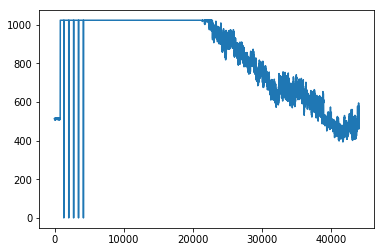

In [10]:
plt.plot(filtdat.raw_data[filtdat.metadata['Out_of_bounds'][2]])

### Locate the stimulation electrode

In [8]:
#Known index
center_el=6972
ind_cent=np.where(filtdat.metadata['clean_abs_inds']==center_el)[0]
center_x = filtdat.metadata['x_clean'][ind_cent]
center_y = filtdat.metadata['y_clean'][ind_cent]

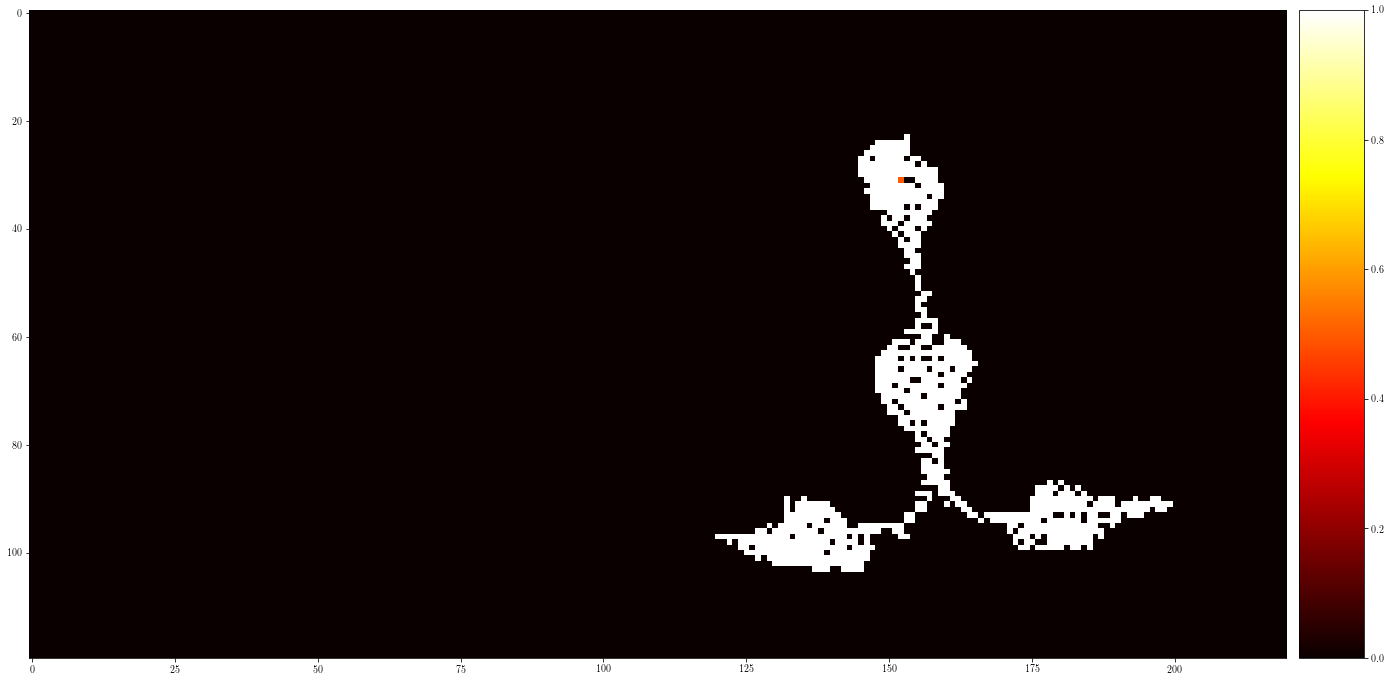

In [9]:
el_array = filtdat.metadata['electrode_map']
el_array[center_y,center_x]=0.5
fig=plt.figure(figsize=(18,9))
ax=fig.add_axes([0,0,0.97,1])
#ax=fig.add_subplot(111)
i = ax.imshow(el_array,aspect='auto',cmap='hot',interpolation='none')
colorbar_ax = fig.add_axes([0.98,0,0.05,1])#Place colorbar next to el_array
#ax.set_axis_off() #Disable the axis labels
fig.colorbar(i,cax=colorbar_ax)

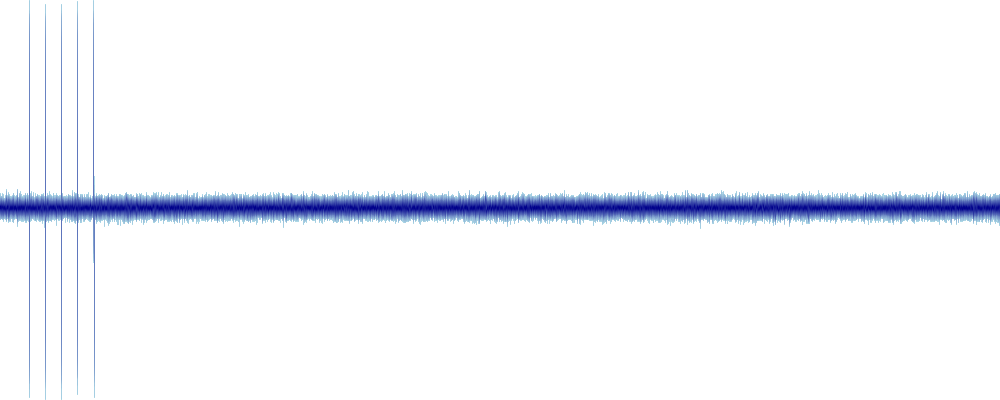

In [64]:
#Show all curves
d0 = ds.utils.dataframe_from_multiple_sequences(filtdat.metadata['time'][:],filtdat.butter_data[:,:])
cvs = ds.Canvas(plot_height=400, plot_width=1000)
agg = cvs.line(d0, 'x', 'y', ds.count())   
img0 = tf.shade(agg, how='eq_hist')
img0

### Get the indicies of the pulse

In [58]:
#stim_edges = np.where(np.diff(filtdat.metadata['DAC']>230)==True)[0][1:-1:2]
stim_edges = np.where(np.diff(filtdat.metadata['DAC']>520)==True)[0]
print stim_edges

[  741   751  2161  2171  3581  3591  5001  5011  6421  6431  7841  7851
  9261  9271 10681 10691 12101 12111 13521 13531 14941 14951 16361 16371
 17781 17791 19201 19211 20621 20631 22041 22051 23461 23471 24881 24891
 26301 26311 27721 27731 29141 29151 30561 30571 31981 31991 33401 33411
 34821 34831 36241 36251 37661 37671 39081 39091 40501 40511 41921 41931
 43341 43351 44761 44771 46181 46191 47601 47611 49021 49031 50441 50451
 51861 51871 53281 53291 54701 54711 56121 56131 57541 57551 58961 58971
 60381 60391 61801 61811 63221 63231 64641 64651 66061 66071 67481 67491
 68901 68911 70321 70331]


[  731   741   751  2151  2161  2171  3571  3581  3591  4991  5001  5011
  6411  6421  6431  7831  7841  7851  9251  9261  9271 10671 10681 10691
 12091 12101 12111 13511 13521 13531 14931 14941 14951 16351 16361 16371
 17771 17781 17791 19191 19201 19211 20611 20621 20631 22031 22041 22051
 23451 23461 23471 24871 24881 24891 26291 26301 26311 27711 27721 27731
 29131 29141 29151 30551 30561 30571 31971 31981 31991 33391 33401 33411
 34811 34821 34831 36231 36241 36251 37651 37661 37671 39071 39081 39091
 40491 40501 40511 41911 41921 41931 43331 43341 43351 44751 44761 44771
 46171 46181 46191 47591 47601 47611 49011 49021 49031 50431 50441 50451
 51851 51861 51871 53271 53281 53291 54691 54701 54711 56111 56121 56131
 57531 57541 57551 58951 58961 58971 60371 60381 60391 61791 61801 61811
 63211 63221 63231 64631 64641 64651 66051 66061 66071 67471 67481 67491
 68891 68901 68911 70311 70321 70331]


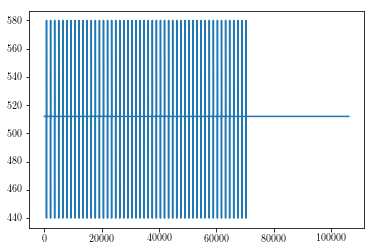

In [6]:
#Plot the DAC trace and find the indeces of the pulse
plt.plot(filtdat.metadata['DAC'])
DAC_changes = np.where(np.diff(filtdat.metadata['DAC'])!=0)[0]
print DAC_changes

### Check if stimulation artefact looks similar on all pulses

/home/user/anaconda2/envs/ds/lib/python2.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if sys.path[0] == '':


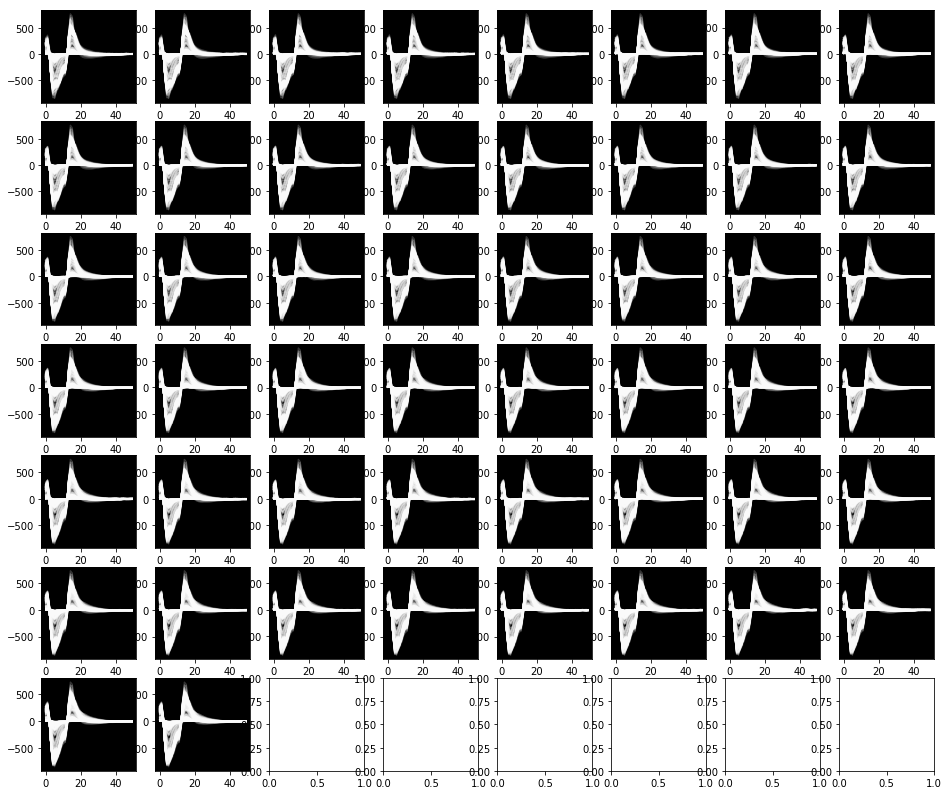

In [72]:
num_hor_plot=8
num_ver_plots=len(stim_edges[::2])/num_hor_plot+1
plot_square_size=2

fig,axarr=plt.subplots(num_ver_plots,num_hor_plot,figsize=(plot_square_size*num_hor_plot,plot_square_size*num_ver_plots))
for ids,i in enumerate(stim_edges[::2]):
    ver_idx=ids/num_hor_plot
    hor_idx=ids%num_hor_plot
    for j,s in enumerate(filtdat.butter_data):
        if j not in filtdat.metadata['Out_of_bounds']:
            axarr[ver_idx,hor_idx].plot(s[i:i+50],alpha=0.2,color='w')
    axarr[ver_idx,hor_idx].set_axis_bgcolor('k')

### Plot the first stim artefact and check dependece to radius

(889, 1)


/home/user/anaconda2/envs/ds/lib/python2.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


Text(0,0.5,u'[amplitude]')

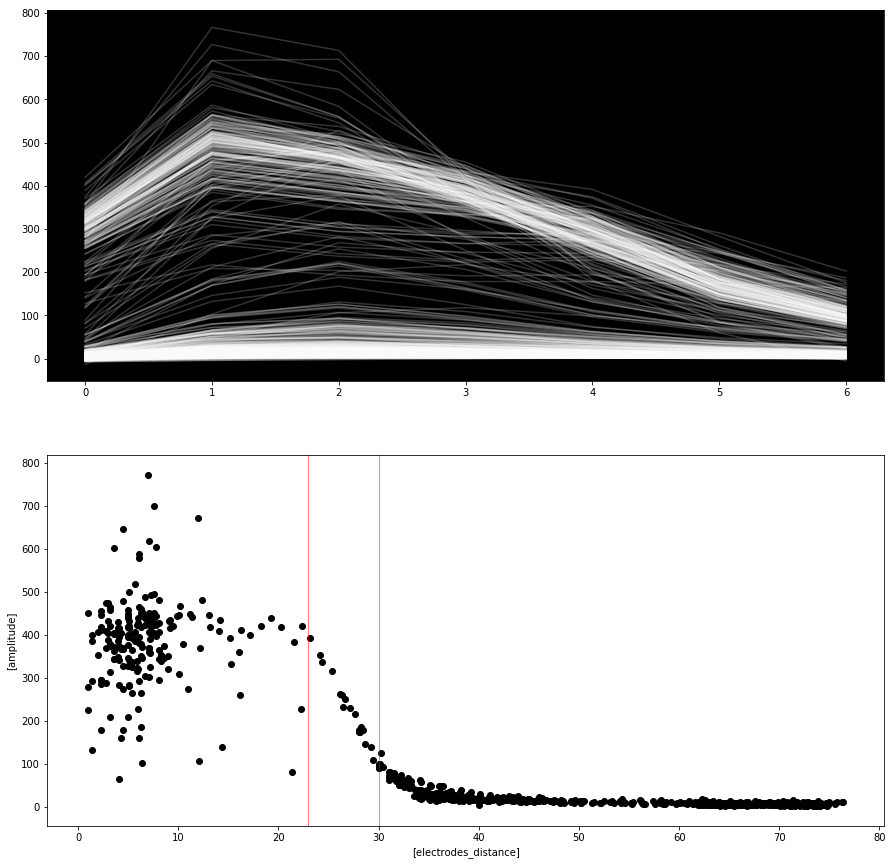

In [111]:
start = stim_edges[1]+3
end = stim_edges[1]+10

line_1 = 23
line_2 = 30

num_hor_plot=1
num_ver_plot=2

fig,axarr=plt.subplots(num_ver_plot,num_hor_plot,figsize=(15,15))

amps=[]
dists=[]
    
for i,j in enumerate(filtdat.butter_data):
    if i not in filtdat.metadata['Out_of_bounds']:
        axarr[0].plot(j[start:end],alpha=0.2,color='w')
        amp = np.max(j[start:end])-np.min(j[start:end])
        dist_x = filtdat.metadata['x_clean'][i]-center_x
        dist_y = filtdat.metadata['y_clean'][i]-center_y
        dist = np.sqrt(np.power(dist_x,2)+np.power(dist_y,2))
        axarr[1].scatter(dist,amp,color='k')
        amps.append(amp)
        dists.append(dist)
    
dists = np.asarray(dists)
print dists.shape
amps = np.asarray(amps)
clust_1=dists<line_1
clust_3 = dists>line_2
clust_2=clust_1==clust_3
    
#z = np.polyfit(dists[clust_2],amps[clust_2],1)
#p_line = np.poly1d(z)
#xp = np.linspace(line_1,line_2,100)
#axarr[1].plot(xp,p_line(xp),'-')
    
axarr[1].axvline(x=line_1,color='r',linewidth=0.5)
axarr[1].axvline(x=line_2,color='r',linewidth=0.5)
axarr[0].set_axis_bgcolor('k')
plt.xlabel('[electrodes_distance]')
plt.ylabel('[amplitude]')

#newpath = ('/').join(path.split('/')[:-1])
#plt.savefig(newpath+'/stimulus_artefacts_amp_'+str(path.split('.')[0][-3:])+'.png',bbox_inches='tight',pad_inches=0)

### Highlight the three areas on map

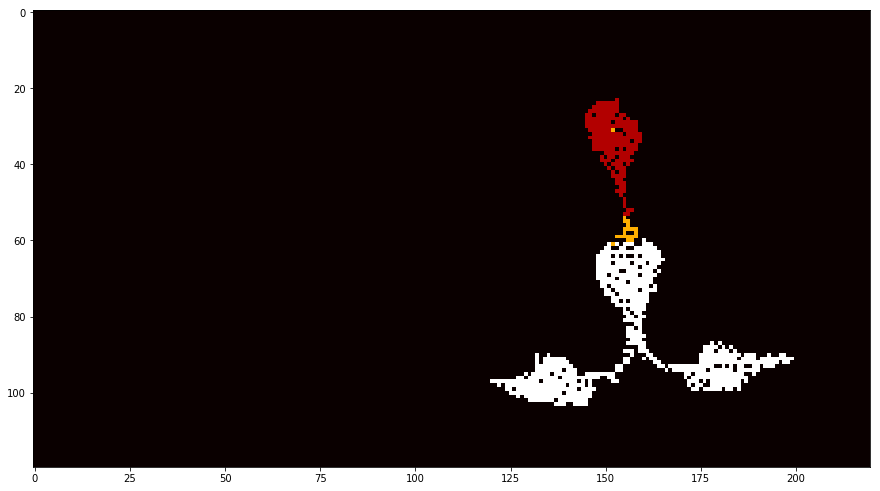

In [110]:
dists = np.asarray(dists)


clust_1=dists<line_1
clust_3 = dists>line_2
clust_2=clust_1==clust_3

el_map = np.copy(filtdat.metadata['electrode_map'])

el_map[np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_1.flatten()],np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])[clust_1.flatten()]]=0.2
el_map[np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_2.flatten()],np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])[clust_2.flatten()]]=0.5
el_map[np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_3.flatten()],np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])[clust_3.flatten()]]=0.8

plt.figure(figsize=(15,10))
plt.imshow(el_map,cmap='hot')

#newpath = ('/').join(path.split('/')[:-1])
#plt.savefig(newpath+'/stimulus_artefacts_map.png',bbox_inches='tight',pad_inches=0)

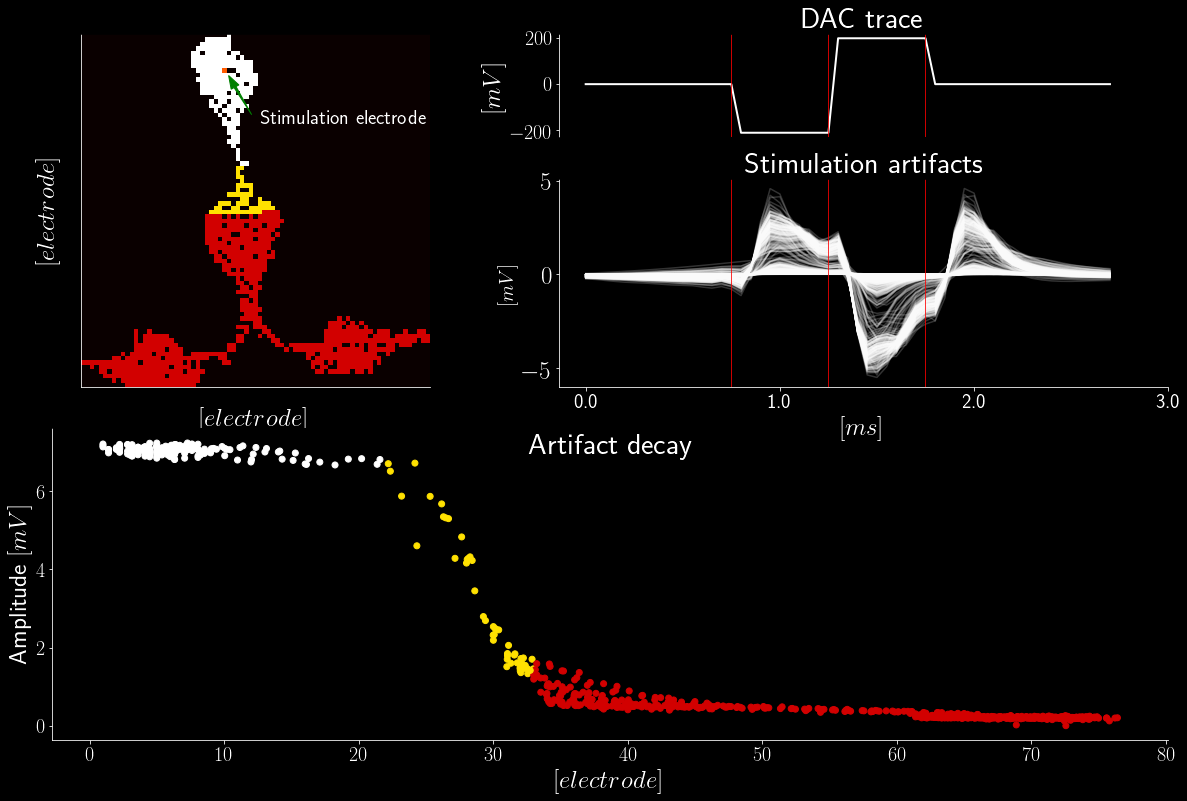

In [13]:
# Add corrected trace to the curve

fig = plt.figure(figsize=(20,13),facecolor='k')
gs = GridSpec(3,2,height_ratios=[1,2,3],width_ratios=[2,3])
ax1 = plt.subplot(gs[:2,0])
ax2 = plt.subplot(gs[2,:],facecolor='k')
ax3 = plt.subplot(gs[0,1],facecolor='k')
ax4 = plt.subplot(gs[1,1],facecolor='k')

start= DAC_changes[-6]-15
end = DAC_changes[-4]+20
amps=[]
dists=[]

#Plot all traces to ax3 and scatter the distance to ax2
for i,j in enumerate(filtdat.butter_data):    
    ax4.plot(j[start:end]*0.00629,alpha=0.2,color='w')
    amp = np.max(j[start:end])-np.min(j[start:end])
    if i not in filtdat.metadata['Out_of_bounds']:
        dist_x = filtdat.metadata['x_clean'][i]-center_x
        dist_y = filtdat.metadata['y_clean'][i]-center_y
        dist = np.sqrt(np.power(dist_x,2)+np.power(dist_y,2))[0]
        amps.append(amp)
        dists.append(dist)
        x,y=filtdat.metadata['x_clean'][i],filtdat.metadata['y_clean'][i]

#Delineate the regimes on the scatterplot
dist_line_1 = 22
dist_line_2 = 33
#defines the clusters in the scatterplot
clust_1=np.asarray(dists)<dist_line_1
clust_3 = np.asarray(dists)>dist_line_2
clust_2=clust_1==clust_3

filtdat.metadata['electrode_map'][np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_1.flatten()],
                                  np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])
                                  [clust_1.flatten()]]=1
filtdat.metadata['electrode_map'][np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_2.flatten()],
                                  np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])
                                  [clust_2.flatten()]]=0.7
filtdat.metadata['electrode_map'][np.delete(filtdat.metadata['y_clean'],filtdat.metadata['Out_of_bounds'])[clust_3.flatten()],
                                  np.delete(filtdat.metadata['x_clean'],filtdat.metadata['Out_of_bounds'])
                                  [clust_3.flatten()]]=0.3

#To color the regimes in the scatterplot
regimes = np.ones_like(dists)
regimes[clust_1]=1
regimes[clust_2]=0.7
regimes[clust_3]=0.3
        
norm = matplotlib.colors.Normalize(vmin=0,vmax=1.)        
ax2.scatter(np.asarray(dists),np.asarray(amps)*0.00629,c=regimes,norm = norm,cmap='hot')

#Calculate the the corrected trace
mean_trace = np.mean(filtdat.butter_data[:,start:end],axis=0) #Calculate the mean trace
mean_amp = np.max(mean_trace)-np.min(mean_trace) #and the ampltide of that mean trace

ax4.set_ylabel(r'$[mV]$',fontsize=20,color='w')
ax4.set_xticks(np.linspace(0,60,4))
ax4.set_xticklabels(np.linspace(0,60*0.05,4))
ax4.set_xlabel(r'$[ms]$',fontsize=25,color='w')
ax4.tick_params(axis='both',color='w',labelcolor='w',labelsize=20)
ax4.set_title(r'Stimulation artifacts',fontsize=30,color='w')
ax4.tick_params(axis='y',color='w',labelcolor='w',labelsize=25)
ax4.spines['left'].set_color('w')
ax4.spines['bottom'].set_color('w')


ax2.set_title(r'Artifact decay',fontsize=30,color='w',y=0.9)
ax2.set_xlabel(r'$[electrode]$',fontsize=25,color='w')
ax2.set_ylabel(r'Amplitude $[mV]$',fontsize=25,color='w')
ax2.tick_params(axis='both',color='w',labelcolor='w',labelsize=20)
ax2.spines['left'].set_color('w')
ax2.spines['bottom'].set_color('w')


#Plot the DAC trace
DAC_mv = (filtdat.metadata['DAC'][start:end]-512.)*2.92
ax3.plot(DAC_mv,color='w',linewidth=2)

ax3.set_title(r'DAC trace',fontsize=30,color='w')
ax3.set_ylabel(r'$[mV]$',fontsize=25,color='w')
ax3.set_xticks(np.linspace(0,60,4))
ax3.set_xticklabels(np.linspace(0,60*0.05,4))
ax3.xaxis.set_visible(False)
ax3.tick_params(axis='y',color='w',labelcolor='w',labelsize=20)
ax3.spines['left'].set_color('w')

#Add some lines
line_1 = DAC_changes[-6]-start
line_2 = DAC_changes[-5]-start
line_3 = DAC_changes[-4]-start

ax3.axvline(x=line_1,color='r',linewidth=0.8)
ax4.axvline(x=line_1,color='r',linewidth=0.8)
ax3.axvline(x=line_2,color='r',linewidth=0.8)
ax4.axvline(x=line_2,color='r',linewidth=0.8)
ax3.axvline(x=line_3,color='r',linewidth=0.8)
ax4.axvline(x=line_3,color='r',linewidth=0.8)

#Plot the routed electrodes to ax1
x_range = [np.min(filtdat.metadata['x_clean']),np.max(filtdat.metadata['x_clean'])]
y_range = [np.min(filtdat.metadata['y_clean']),np.max(filtdat.metadata['y_clean'])]

ax1.imshow(filtdat.metadata['electrode_map'][y_range[0]:y_range[1],x_range[0]:x_range[1]],cmap='hot')
ax1.set_xlabel(r'$[electrode]$',fontsize=25,color='w')
ax1.set_ylabel(r'$[electrode]$',fontsize=25,color='w')
ax1.spines['left'].set_color('w')
ax1.spines['bottom'].set_color('w')
ax1.arrow(38,18,-5,-9,width=0.5,length_includes_head=True,head_width=2,head_length=3,color='g')
ax1.text(40,20,r'Stimulation electrode',fontsize=20,color='w')

newpath = ('/').join(path.split('/')[:-1])
plt.savefig(newpath+'/stimulus_PDMS_artefacts_thesis'+'.png',dpi=600,bbox_inches='tight',pad_inches=0.2, facecolor=fig.get_facecolor(), edgecolor='none')

### Saturation plot

#### /home/user/Desktop/Data/2018-4-16/2013/Stimulation/configstructure_000.raw.h5

In [18]:
stimlist = File(path,'r')
stim_el = stimlist['Stim_el_structure_1/values'][:]

In [19]:
from matplotlib.patches import Circle, ConnectionPatch
from matplotlib import colors

In [20]:
#Make a discrete colormap
cmap = colors.ListedColormap(['black','red','green','white'])
bounds = [0, 0.2, 0.4, 0.7, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

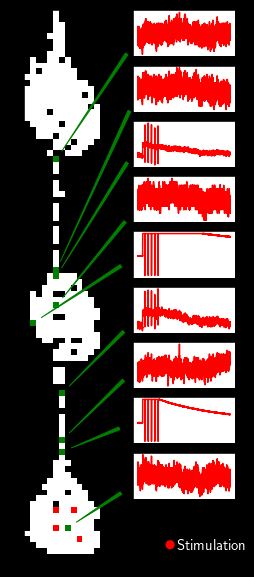

In [30]:
fig = plt.figure(figsize=(4,10),facecolor='k')
gs = GridSpec(10,2)
ax0 = plt.subplot(gs[:,0])
ax9 = plt.subplot(gs[8,1])
ax8 = plt.subplot(gs[7,1])
ax7 = plt.subplot(gs[6,1])
ax6 = plt.subplot(gs[5,1])
ax5 = plt.subplot(gs[4,1])
ax4 = plt.subplot(gs[3,1])
ax3 = plt.subplot(gs[2,1])
ax2 = plt.subplot(gs[1,1])
ax1 = plt.subplot(gs[0,1])
axtext = plt.subplot(gs[9,1],facecolor='k')

el_map = np.copy(filtdat.metadata['electrode_map'])

#Stim el
xses = stim_el%220
yses = stim_el/220
el_map[yses,xses]=0.3

#Crit_el
x_crit = filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces']]%220
y_crit = filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces']]/220
el_map[y_crit[1:],x_crit[1:]]=0.6
ax8.plot(filtdat.raw_data[filtdat.metadata['Critical_traces'][2],:20000],color='r')
ax8.xaxis.set_visible(False)
ax5.plot(filtdat.raw_data[filtdat.metadata['Critical_traces'][1],:20000],color='r')
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)

#Other traces
ind9 = np.where(filtdat.metadata['clean_abs_inds']==19394+2)[0][0]
el_map[filtdat.metadata['y_clean'][ind9],filtdat.metadata['x_clean'][ind9]]=0.6
ax9.plot(filtdat.raw_data[ind9,:20000],color='r')
ax9.xaxis.set_visible(False)
ax9.yaxis.set_visible(False)

ind7 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-440)[0][0]
el_map[filtdat.metadata['y_clean'][ind7],filtdat.metadata['x_clean'][ind7]]=0.6
ax7.plot(filtdat.raw_data[ind7,:20000],color='r')
ax7.xaxis.set_visible(False)
ax7.yaxis.set_visible(False)

ind6 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-10*220)[0][0]
el_map[filtdat.metadata['y_clean'][ind6],filtdat.metadata['x_clean'][ind6]]=0.6
ax6.plot(filtdat.raw_data[ind6,:20000],color='r')
ax6.xaxis.set_visible(False)
ax6.yaxis.set_visible(False)

ind4 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-25*220-1)[0][0]
el_map[filtdat.metadata['y_clean'][ind4],filtdat.metadata['x_clean'][ind4]]=0.6
ax4.plot(filtdat.raw_data[ind4,:20000],color='r')
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)

ind3 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-30*220-1)[0][0]
el_map[filtdat.metadata['y_clean'][ind3],filtdat.metadata['x_clean'][ind3]]=0.6
ax3.plot(filtdat.raw_data[ind3,:20000],color='r')
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

ind2 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-31*220-1)[0][0]
el_map[filtdat.metadata['y_clean'][ind2],filtdat.metadata['x_clean'][ind2]]=0.6
ax2.plot(filtdat.raw_data[ind2,:20000],color='r')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

ind1 = np.where(filtdat.metadata['clean_abs_inds']==filtdat.metadata['clean_abs_inds'][filtdat.metadata['Critical_traces'][2]]-50*220-1)[0][0]
el_map[filtdat.metadata['y_clean'][ind1],filtdat.metadata['x_clean'][ind1]]=0.6
ax1.plot(filtdat.raw_data[ind1,:20000],color='r')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

axtext.text(0.35,0.1,'Stimulation',color='w',fontsize=15)
axtext.set_aspect('equal')
circ = Circle((0.2, 0.2), 0.1, fc='red')
axtext.add_patch(circ)

coordsA='data'
coordsB='data'

con = ConnectionPatch(xyA=(0,490), xyB=(filtdat.metadata['x_clean'][ind1]-x_range[0],filtdat.metadata['y_clean'][ind1]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax1, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax1.add_artist(con)

con = ConnectionPatch(xyA=(0,510), xyB=(filtdat.metadata['x_clean'][ind2]-x_range[0],filtdat.metadata['y_clean'][ind2]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax2, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax2.add_artist(con)

con = ConnectionPatch(xyA=(0,560), xyB=(filtdat.metadata['x_clean'][ind3]-x_range[0],filtdat.metadata['y_clean'][ind3]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax3, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax3.add_artist(con)

con = ConnectionPatch(xyA=(0,525), xyB=(filtdat.metadata['x_clean'][ind4]-x_range[0],filtdat.metadata['y_clean'][ind4]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax4, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax4.add_artist(con)

con = ConnectionPatch(xyA=(0,500), xyB=(x_crit[1]-x_range[0],y_crit[1]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax5, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax5.add_artist(con)

con = ConnectionPatch(xyA=(0,500), xyB=(filtdat.metadata['x_clean'][ind6]-x_range[0],filtdat.metadata['y_clean'][ind6]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax6, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax6.add_artist(con)

con = ConnectionPatch(xyA=(0,490), xyB=(filtdat.metadata['x_clean'][ind7]-x_range[0],filtdat.metadata['y_clean'][ind7]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax7, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax7.add_artist(con)

con = ConnectionPatch(xyA=(0,500), xyB=(x_crit[2]-x_range[0],y_crit[2]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax8, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax8.add_artist(con)

con = ConnectionPatch(xyA=(0,510), xyB=(filtdat.metadata['x_clean'][ind9]-x_range[0],filtdat.metadata['y_clean'][ind9]), coordsA=coordsA, coordsB=coordsB,
                      axesA=ax9, axesB=ax0,
                      arrowstyle='wedge', shrinkB=10,shrinkA=20,color='green',linewidth=1)
ax9.add_artist(con)

x_range = [np.min(filtdat.metadata['x_clean']),np.max(filtdat.metadata['x_clean'])]
y_range = [np.min(filtdat.metadata['y_clean']),np.max(filtdat.metadata['y_clean'])]
ax0.imshow(el_map[y_range[0]:y_range[1],x_range[0]:x_range[1]],cmap=cmap,norm=norm)

newpath = ('/').join(path.split('/')[:-1])
plt.savefig(newpath+'/stimulus_propagation_PDMS_thesis'+'.png',dpi=600,bbox_inches='tight',pad_inches=0.2, facecolor=fig.get_facecolor(), edgecolor='none')